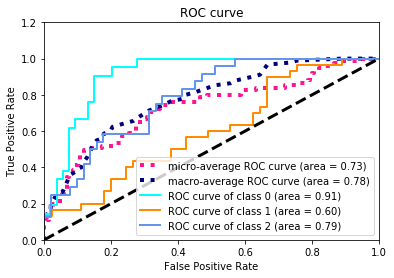

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC

#导入所需的包
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1] 

# 训练模型并预测
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

#绘制roc图
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=2,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 2], [0, 2], 'k--', linewidth=3)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

[0.08944099 0.0447205  0.02981366 0.02236025 0.017866   0.01489142
 0.01312057 0.01148177 0.0102069  0.02686104]
[4.51207152 2.53613776 1.34000809 0.87477705 0.68252303 0.60293259
 0.61807917 0.49788405 0.4391476  0.38381741]


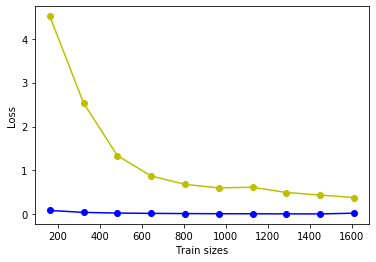

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC

#导入包
digits = load_digits()
X = digits.data
y = digits.target

train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1, 10))

#对每次交叉验证取平均值
train_loss_mean = -np.mean(train_loss, axis=1)
print(train_loss_mean)

test_loss_mean = -np.mean(test_loss, axis=1)
print(test_loss_mean)

#画出学习曲线，蓝黄线分别代表着训练与测试的数据平均值

plt.plot(train_sizes, train_loss_mean, 'o-', color='b', label='Training')
plt.plot(train_sizes, test_loss_mean, 'o-', color='y', label='Cross_validation')
plt.xlabel('Train sizes')
plt.ylabel('Loss')
plt.show()

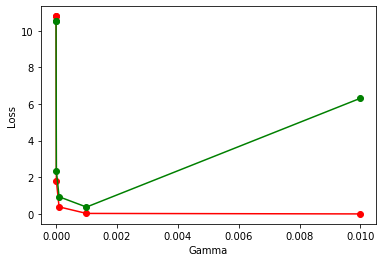

In [52]:
param_range = np.logspace(-7, -2, 6)

# 确定validation曲线，指定params的名字和范围
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='neg_mean_squared_error'
)

# 将每次训练集交叉验证取平均值
train_loss_mean = -np.mean(train_loss, axis=1)

# 将每次测试集交叉验证取平均值
test_loss_mean = -np.mean(test_loss, axis=1)

# 画图，红色是训练平均损失值，绿色是测试平均损失值
plt.plot(param_range, train_loss_mean, 'o-', color='r', label='Training')
plt.plot(param_range, test_loss_mean, 'o-', color='g', label='Cross_validation')
plt.xlabel('Gamma')
plt.ylabel('Loss')
plt.show()